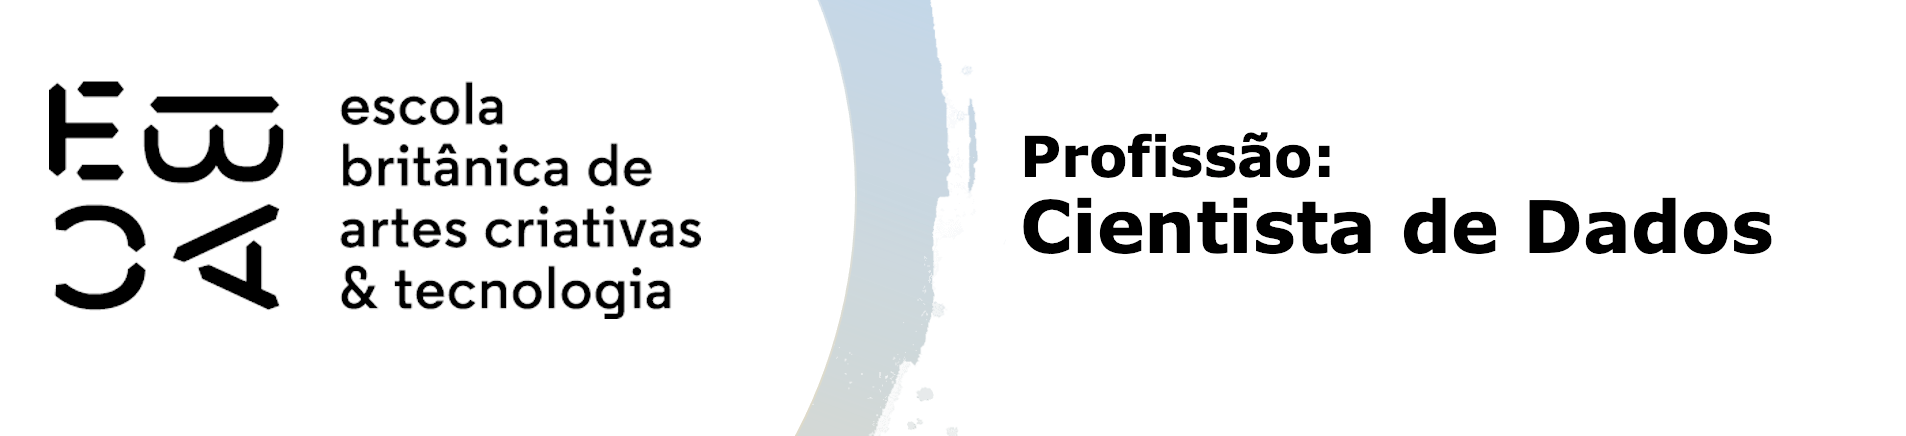

# Métodos hierárquicos de agrupamento - Tarefa

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [6]:
pg = sns.load_dataset('penguins')

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

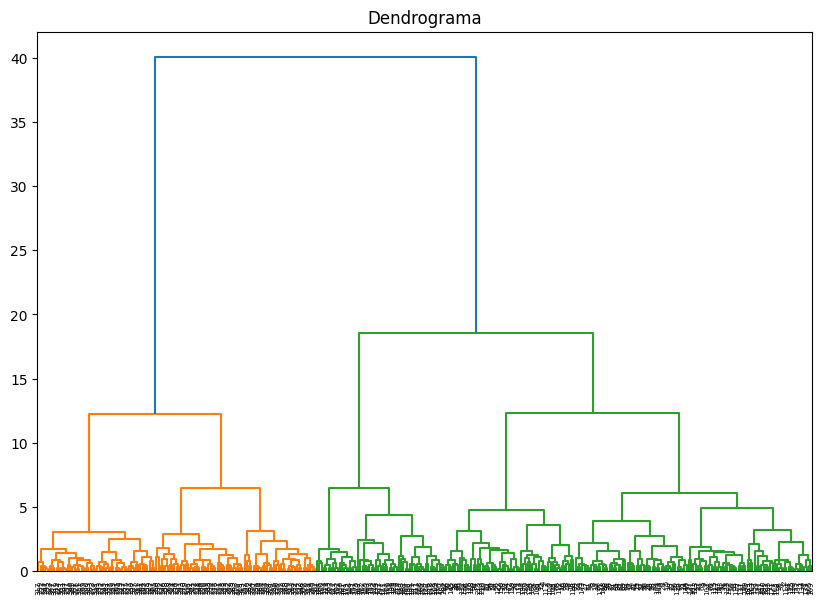

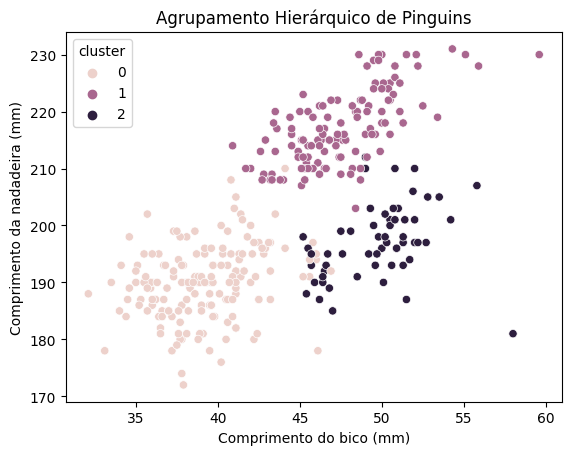

In [7]:
# Selecionar variáveis quantitativas da base de pinguins
quantitative_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Filtrar as colunas relevantes e eliminar valores faltantes
data_quant = pg[quantitative_vars].dropna()

# Padronizar as variáveis
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_quant)

# Realizar o agrupamento hierárquico
n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = clustering.fit_predict(data_scaled)

# Adicionar as informações de cluster ao DataFrame
data_quant['cluster'] = cluster_labels

# Plotar o Dendrograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma")
dendrogram = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

plt.show()

# Visualizar os grupos
sns.scatterplot(data=data_quant, x='bill_length_mm', y='flipper_length_mm', hue='cluster')
plt.title("Agrupamento Hierárquico de Pinguins")
plt.xlabel("Comprimento do bico (mm)")
plt.ylabel("Comprimento da nadadeira (mm)")
plt.show()


## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [8]:
# Adicionar informações de espécies ao DataFrame
data_quant['species'] = pg.loc[data_quant.index, 'species']

# Calcular a contagem de pinguins de cada espécie em cada grupo
species_group_counts = data_quant.groupby(['cluster', 'species']).size().unstack(fill_value=0)

# Descrever as estatísticas das variáveis quantitativas em cada grupo
group_stats = data_quant.groupby('cluster').describe()

# Imprimir os resultados
print("Contagem de pinguins de cada espécie em cada grupo:")
print(species_group_counts)

print("\nEstatísticas das variáveis quantitativas em cada grupo:")
print(group_stats)


Contagem de pinguins de cada espécie em cada grupo:
species  Adelie  Chinstrap  Gentoo
cluster                           
0           151         11       0
1             0          0     123
2             0         57       0

Estatísticas das variáveis quantitativas em cada grupo:
        bill_length_mm                                                      \
                 count       mean       std   min   25%   50%    75%   max   
cluster                                                                      
0                162.0  39.150000  2.936560  32.1  37.0  39.0  41.10  46.9   
1                123.0  47.504878  3.081857  40.9  45.3  47.3  49.55  59.6   
2                 57.0  49.752632  2.710107  45.2  47.5  50.2  51.30  58.0   

        bill_depth_mm             ... flipper_length_mm        body_mass_g  \
                count       mean  ...               75%    max       count   
cluster                           ...                                        
0            

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [9]:
# Selecionar variáveis quantitativas da base de pinguins
quantitative_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Filtrar as colunas relevantes e eliminar valores faltantes
data_quant = pg[quantitative_vars].dropna()

# Padronizar as variáveis
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_quant)

# Realizar o agrupamento hierárquico com 4 grupos
n_clusters = 4
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = clustering.fit_predict(data_scaled)

# Adicionar as informações de cluster ao DataFrame
data_quant['cluster'] = cluster_labels
data_quant['species'] = pg.loc[data_quant.index, 'species']
data_quant['sex'] = pg.loc[data_quant.index, 'sex']

# Calcular a contagem de pinguins de cada espécie em cada grupo
species_group_counts = data_quant.groupby(['cluster', 'species']).size().unstack(fill_value=0)

# Calcular a contagem de pinguins machos e fêmeas de cada espécie em cada grupo
sex_species_group_counts = data_quant.groupby(['cluster', 'species', 'sex']).size().unstack(fill_value=0)

# Imprimir os resultados
print("Contagem de pinguins de cada espécie em cada grupo:")
print(species_group_counts)

print("\nContagem de pinguins machos e fêmeas de cada espécie em cada grupo:")
print(sex_species_group_counts)

Contagem de pinguins de cada espécie em cada grupo:
species  Adelie  Chinstrap  Gentoo
cluster                           
0             0          0     123
1            97          8       0
2             0         57       0
3            54          3       0

Contagem de pinguins machos e fêmeas de cada espécie em cada grupo:
sex                Female  Male
cluster species                
0       Gentoo         58    61
1       Adelie         72    21
        Chinstrap       8     0
2       Chinstrap      23    34
3       Adelie          1    52
        Chinstrap       3     0
